<a href="https://colab.research.google.com/github/gdscbpdc/gdscbpdc.github.io/blob/main/docs/2022-2023/Plotly_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Data Visualization with Plotly

Plotly is an open-source data visualization library that enables users to create interactive and publication-quality graphs, charts, and dashboards. It is widely used by data scientists, engineers, and business professionals to analyze and communicate data insights effectively.

Plotly provides a variety of graph types, including scatter plots, line charts, bar charts, heatmaps, and more. It also supports various programming languages, including Python, R, and JavaScript.

Plotly can be used for a wide range of applications, including data exploration, data analysis, data presentation, and reporting. It is particularly useful in fields such as finance, healthcare, and marketing, where data analysis and visualization are critical for decision-making.

# Installation

In [ ]:
! pip install plotly --upgrade

In [ ]:
! pip install pandas==1.5.3

# Old vs New

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

<Axes: >

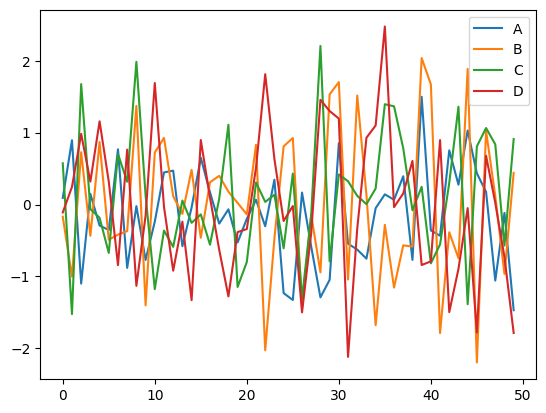

In [ ]:
# Create a dataframe using a NumPy array that is 50 by 4
arr_1 = np.random.randn(50, 4)
df_1 = pd.DataFrame(arr_1, columns=['A','B','C','D'])
df_1.head()

# Compare old plots to a Plotly interactive plot
# You can save as PNG, Zoom, Pan, Turn off & on Data and more

fig = px.line(df_1, title = "Plotly")
fig.show()

df_1.plot()

One of the main advantages of Plotly is its ability to create interactive and dynamic visualizations. With Plotly, users can zoom, pan, and hover over data points to explore the underlying data. It also allows users to add annotations, labels, and other customizations to their graphs.

# The Basics

Websites to refer:

[Plotly API Refrence](https://plotly.com/python-api-reference/)

[Sample Data](https://plotly.com/python-api-reference/generated/plotly.data.html)




Got stuck ?

1. Use Plotly Fundamentals documentation (https://plotly.com/python/plotly-fundamentals/)

2. Use Plotly Forum (https://community.plotly.com/)

1. Layout represents the chart (frames, title, color, tick, hover, legend)
2. Traces are representing the data (inside the layout)

[Traces and Layout Refrences](https://plotly.com/python/reference/index/)

# Bar Graph

In [ ]:
medals = px.data.medals_long(indexed=False)

fig = px.bar(medals, x='nation', y='count', color='medal', 
             title='Medal Count for Olympic Short Track Speed Skating')
fig.show()

Let us derive some insights:

In [ ]:
medals = px.data.medals_long(indexed=False)

# Calculate the total medal count for each nation
total_medals = medals.groupby('nation')['count'].sum()

# Calculate the percentage of each medal for each nation
medals['percentage'] = medals['count'] / total_medals[medals['nation']].values * 100

# Create a new column with the medal count and percentage as a string
medals['text'] = medals['count'].astype(str) + ' (' + medals['percentage'].round(1).astype(str) + '%)'

fig = px.bar(medals, 
             x='nation', y='count', 
             color='medal', 
             title='Medal Count for Olympic Short Track Speed Skating',
             custom_data=['percentage'],
             text='text')

fig.show()

# Pie Chart

In [ ]:
df = px.data.gapminder()
print(df.columns)
print(df.head)

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')
<bound method NDFrame.head of           country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   
...           ...       ...   ...      ...       ...         ...       ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306       ZWE   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786       ZWE   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960       ZWE   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623  

In [ ]:
gapminder = px.data.gapminder()

# Filter the dataset to include only data from the year 2007
gapminder_2007 = gapminder[gapminder['year'] == 2007]

# Group the data by continent and calculate the sum of the population for each continent
grouped_data = gapminder_2007.groupby('continent', as_index=False)['pop'].sum()

# Rename the columns to match the names expected by px.pie
# grouped_data = grouped_data.rename(columns={'continent': 'names', 'pop': 'values'})

# Assign the result to df
df = grouped_data
df.head()

,continent,pop
0,Africa,929539692
1,Americas,898871184
2,Asia,3811953827
3,Europe,586098529
4,Oceania,24549947


In [ ]:
fig = px.pie(df, values='pop', names='continent', title='World Population by Continent (2007)')
# fig.update_traces(textinfo = "label+percent")
fig.show()

# Visualize Maths

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Linear", "Square", "Cube", "Quarted"))

x = np.arange(-30, 30)

fig.add_trace(go.Scatter(x=x, y=x**1, mode='markers'),
              row=1, col=1)

fig.add_trace(go.Scatter(x=x, y=x**2, mode='markers'),
              row=1, col=2)

fig.add_trace(go.Scatter(x=x, y=x**3, mode='markers'),
              row=2, col=1)

fig.add_trace(go.Scatter(x=x, y=x**4, mode='markers'),
              row=2, col=2)

fig.update_layout(showlegend=False, title="What Nice Graphs!")


fig.show()

# Deriving Insights using Graphs

1. Global population is increasing.

In [ ]:
import plotly.express as px

# Load the Gapminder dataset
gapminder = px.data.gapminder()

# Group the data by year and calculate the sum of the population for each year
grouped_data = gapminder.groupby('year', as_index=False)['pop'].sum()

# Create a line chart showing global population over time
fig = px.line(grouped_data, x='year', y='pop', title='Global Population Over Time')
fig.show()

The chart shows that the total world population has been steadily increasing over time.

2. Life expectancy has been increasing.

In [ ]:
import plotly.express as px

# Load the Gapminder dataset
gapminder = px.data.gapminder()
# print(gapminder.columns)

# Create a scatter plot showing life expectancy vs. time
fig = px.scatter(gapminder, x='year', y='lifeExp', trendline='lowess', title='Life Expectancy Over Time')
fig.show()

The plot shows that life expectancy has been increasing around the world.

3. There is a correlation between GDP per capita and life expectancy.

In [ ]:
import plotly.express as px

# Load the Gapminder dataset
gapminder = px.data.gapminder()

# Create a scatter plot showing life expectancy vs. GDP per capita
fig = px.scatter(gapminder, x='gdpPercap', y='lifeExp', color='continent', title='Life Expectancy vs. GDP Per Capita')
fig.show()

This code creates a scatter plot showing the relationship between life expectancy and GDP per capita. The plot shows that there is a clear correlation between the two variables, with countries with higher GDP per capita tending to have higher life expectancies.

4. There are significant differences in GDP per capita between countries.

In [ ]:
import plotly.express as px

# Load the Gapminder dataset
gapminder = px.data.gapminder()

# Create a box plot showing GDP per capita by continent
fig = px.box(gapminder, x='continent', y='gdpPercap', title='GDP Per Capita by Continent')
fig.show()

This code creates a box plot showing GDP per capita by continent. The plot shows that there are significant differences in GDP per capita between continents, with North America and Europe having much higher GDP per capita than Asia, Africa, and South America.

# Scatter Plot

In [ ]:
df = px.data.gapminder()
df_2007 = df.query("year==2007")

# ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]

for template in ["plotly", "plotly_dark"]:
    fig = px.scatter(df_2007,
                     x="gdpPercap", y="lifeExp", size="pop", color="continent",
                    #  text = "country",
                    #  labels={'gdpPercap':'GDP per Capita','lifeExp':'Life Expectancy','pop':'Total Population'},
                     log_x=True, size_max=60,
                     template=template, title="Gapminder 2007: '%s' theme" % template)
    fig.show()

Surface Graph:

In [ ]:
z_data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv")

print(z_data.head())

fig = go.Figure(
    data=go.Surface(z=z_data.values),
    layout=go.Layout(
        title="Mt Bruno Elevation"
        # width=500,
        # height=500,
    ))

fig.update_layout(title="Mt Bruno Elevation:")
fig.show()

   Unnamed: 0          0         1          2          3          4  \
0           0  27.809850  49.61936  83.080670  116.66320  130.41400   
1           1  27.719660  48.55022  65.213740   95.27666  116.99640   
2           2  30.426700  33.47752  44.809530   62.47495   77.43523   
3           3  16.665490  30.10860  39.969520   44.12225   59.57512   
4           4   8.815617  18.35160   8.658275   27.58590   48.62691   

           5         6         7         8  ...        14        15        16  \
0  150.72060  220.1871  156.1536  148.6416  ...  49.96142  21.89279  17.02552   
1  133.90560  152.3412  151.9340  160.1139  ...  33.08871  38.40972  44.24843   
2  104.21530  102.7393  137.0004  186.0706  ...  48.47132  74.71461  60.09090   
3   77.56929  106.8925  166.5539  175.2381  ...  60.55916  55.92124  15.17284   
4   60.18013   91.3286  145.7109  116.0653  ...  47.42691  69.20731  44.95468   

          17         18         19         20         21         22         23  
0  11

# Exercises:

Easy: Create a scatter plot using the px.data.iris dataset, where the x-axis is the "sepal length (cm)" and the y-axis is the "sepal width (cm)". Set the color of the points to be determined by the "species" column.

In [ ]:
import plotly.express as px

df = px.data.iris()

fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
fig.show()

Hard: Create a line chart using the px.data.stocks dataset that shows the daily stock price data for a specific company (e.g. Apple, Google, Amazon, etc.) over time. Customize the chart so that the x-axis shows the date and the y-axis shows the stock price and the chart so that the line is blue and has a width of 2.

In [ ]:
import plotly.graph_objs as go
import pandas as pd

stocks_df = px.data.stocks()
print(stocks_df.columns)

# Define the company to display
company = 'AAPL'
# Load the stock price data and filter for the selected company
stocks_df = stocks_df[["date", company]]
stocks_df.columns = ["Date", "Price"]

# dropna() is a method in pandas library that is used to remove any rows with missing or null values in a pandas DataFrame.
# stocks_df = stocks_df.dropna()

# Convert the Date column to a datetime object
stocks_df["Date"] = pd.to_datetime(stocks_df["Date"])

# Define the line chart trace
line_trace = go.Scatter(x=stocks_df["Date"],
                        y=stocks_df["Price"],
                        mode="lines",
                        name=f"{company} Stock Price",
                        line=dict(color="blue", width=2))

# Create the plot with the line chart trace
fig = go.Figure(data=[line_trace])

# Set the chart layout
fig.update_layout(title=f"{company} Stock Price",
                  xaxis_title="Date",
                  yaxis_title="Price")

# Show the chart
fig.show()


Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')


Advanced:

 Create a candlestick chart using the plotly.data.stocks dataset that shows the daily stock price data for a specific company (e.g. Apple, Google, Amazon, etc.). Customize the chart so that the color of the candlestick changes depending on whether the stock price went up or down that day. Additionally, add a horizontal line to the chart at the average stock price for the selected company.

Hint: You can use the plotly.graph_objs module to create the candlestick chart and the horizontal line, and the pd.DataFrame function from the pandas module to filter and preprocess the data.

In [ ]:
import plotly.graph_objs as go
import pandas as pd

# Define the company to display
company = 'AAPL'
stocks_df = px.data.stocks()
print(stocks_df.columns)
# Load the stock price data and filter for the selected company
stocks_df = stocks_df[["date", company]]

# Rename
stocks_df.columns = ["Date", "Price"]
stocks_df = stocks_df.dropna()

# Convert the Date column to a datetime object
stocks_df["Date"] = pd.to_datetime(stocks_df["Date"])

# Add a new column for whether the stock price went up or down that day
stocks_df["Change"] = (stocks_df["Price"] - stocks_df["Price"].shift(1)) > 0
stocks_df.loc[stocks_df.index[0], "Change"] = False

# Define the candlestick chart trace
candlestick_trace = go.Candlestick(x=stocks_df["Date"],
                                   open=stocks_df["Price"],
                                   high=stocks_df["Price"],
                                   low=stocks_df["Price"],
                                   close=stocks_df["Price"],
                                   increasing=dict(line=dict(color="Green")), #00CC94
                                   decreasing=dict(line=dict(color="Red"))) #F50000

# Define the horizontal line trace for the average stock price
avg_price = stocks_df["Price"].mean()
line_trace = go.Scatter(x=[stocks_df["Date"].iloc[0], stocks_df["Date"].iloc[-1]],
                        y=[avg_price, avg_price],
                        name="Average Price",
                        line=dict(color="Grey", dash="dash")) #7F7F7F

# Create the plot with the candlestick chart and the horizontal line
fig = go.Figure(data=[candlestick_trace, line_trace])

# Set the chart layout
fig.update_layout(title=f"{company} Stock Price",
                  yaxis_title="Price",
                  xaxis_rangeslider_visible=False)

# Show the chart
fig.show()


Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')
